In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Bài tập 4.1
Sau khi phân tích dữ liệu bán hàng trong vài tháng, chủ một cửa
hàng thiết bị đã đưa ra phân phối xác suất đồng thời như sau của số
lượng tủ lạnh (X: Refrigerators) và bếp (Y: Stoves) được bán hàng ngày.
1. Tìm hàm phân phối biên của X,Y
2. Tìm kỳ vọng, phương sai của X,Y
3. Tìm cov(X,Y), hệ số tương quan
4. Tìm ma trận hiệp phương sai của (X,Y)

In [5]:
jpmf = np.array([[0.08, 0.14, 0.12],
                 [0.09, 0.17, 0.13],
                 [0.05, 0.18, 0.04]])

In [6]:
pmfX = np.sum(jpmf, axis=0)
print("Phân phối biên của X:")
print(pmfX)

Phân phối biên của X:
[0.22 0.49 0.29]


In [7]:
pmfY = np.sum(jpmf, axis=1)
print("Phân phối biên của Y:")
print(pmfY)

Phân phối biên của Y:
[0.34 0.39 0.27]


In [8]:
X = np.array([0, 1, 2])
EX = np.sum(X * pmfX)
VarX = np.sum(X**2 * pmfX) - (np.sum(X * pmfX)) ** 2

print("Kì vọng của X:", EX)
print("Phương sai của X:", VarX)

Kì vọng của X: 1.07
Phương sai của X: 0.5050999999999999


In [9]:
Y = np.array([0, 1, 2])
EY = np.sum(Y * pmfY)
VarY = np.sum(Y**2 * pmfY) - (np.sum(Y * pmfY)) ** 2

print("Kì vọng của Y:", EY)
print("Phương sai của Y:", VarY)

Kì vọng của Y: 0.9299999999999999
Phương sai của Y: 0.6050999999999999


In [15]:
CovXY = 0

for i in range(3):
    for j in range(3):
        CovXY += jpmf[i][j] * (i - EX) * (j - EY)
        
print("Cov(X, Y)=", CovXY)
print("Hệ số tương quan:", CovXY / np.sqrt(VarX * VarY))

Cov(X, Y)= -0.06470000000000001
Hệ số tương quan: -0.1170312974896826


In [16]:
print("Ma trận hiệp phương sai:")
print(np.array([[VarX, CovXY], [CovXY, VarY]]))

Ma trận hiệp phương sai:
[[ 0.5051 -0.0647]
 [-0.0647  0.6051]]


### Bài tập 4.2
Cho hai biến ngẫu nhiên tuân theo luật phân phối chuẩn độc lập với
nhau có kỳ vọng lần lượt là 30, 40 và độ lệch chuẩn là 2 và 3.
1. Tìm ma trận hiệp phương sai
2. Biểu diễn véc tơ kỳ vọng, ma trận hiệp phương sai qua python
3. Dùng lệnh np.random.multivariate_normal() để tạo ra 500 giá trị
4. Vẽ đồ thị các giá trị đồng thời mà (X,Y) có thể nhận và phân phối
biên trong cùng một đồ thị.

In [17]:
Cov = np.array([[2, 0], [0, 3]])
print("Ma trận hiệp phương sai:")
print(Cov)

Ma trận hiệp phương sai:
[[2 0]
 [0 3]]


In [18]:
Mean = np.array([30, 40])
print("Kì vọng:")
print(Mean)

Kì vọng:
[30 40]


In [20]:
rv = np.random.multivariate_normal(Mean, Cov, 500)
X = rv[:, 0]
Y = rv[:, 1]

C:\Users\phudn4\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


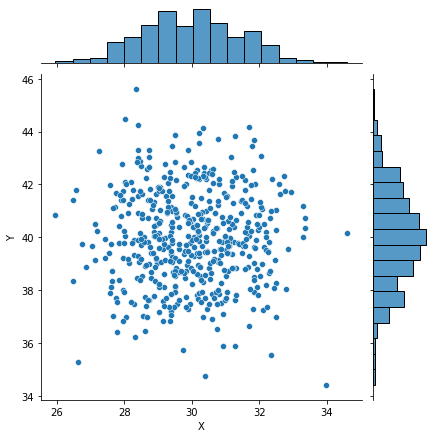

In [21]:
sns.jointplot(X, Y).set_axis_labels("X", "Y")